In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
seed = 42
np.random.seed(seed)
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run

In [33]:
# define data
x_dim = 50
num_train = 50
num_test = 50
proportion = 0.5
def get_data(seed):
    np.random.seed(seed)
    return data.better_v_data(x_dim=x_dim, num_train=num_train, num_test=num_test, proportion=proportion)

In [34]:
# define fitter
num_tries = 1
plot_b_info = constructors.plot_b_info
def get_fitter(c_logreg, c_lsqr, sigma, max_ratio):
    return constructors.baseline_fitter(c_logreg, c_lsqr, sigma, max_ratio=max_ratio, plot_b_info=plot_b_info)

In [35]:
# define hyperparameter search space via an iterator
c_lsqrs = [10,]#100]#,150,500,1000]
c_logregs = [0.1,1.]
sigmas = [0.25,]#5.]#,5.]
max_ratios = [2.,]#5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
    )
nocare_hyperparam_tuples = itertools.product(
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [36]:
# define mapper
mapper = map

In [37]:
#
num_iterations = 1

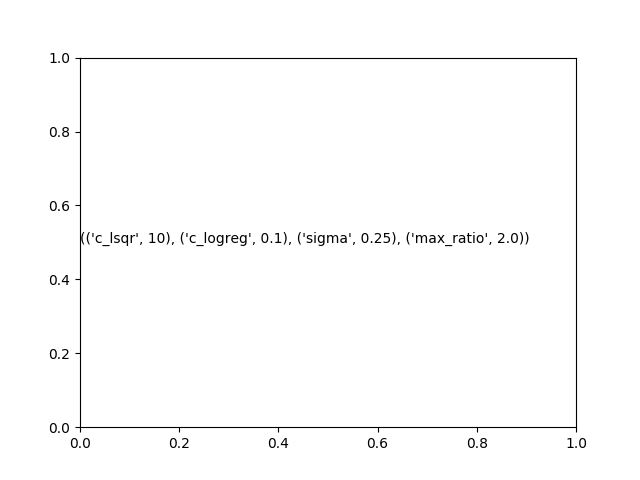

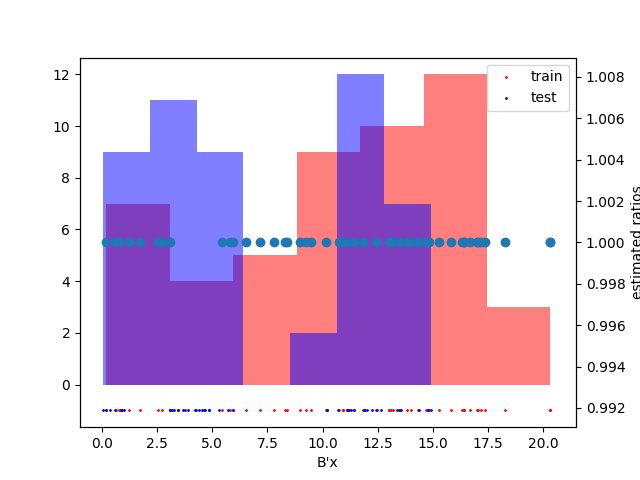

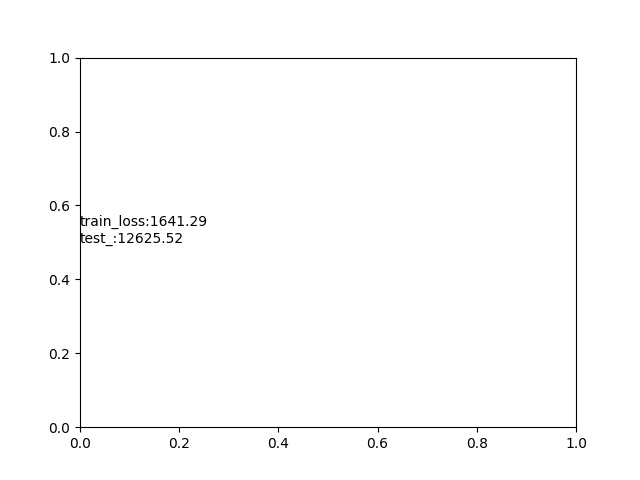

b_norm: 1.0


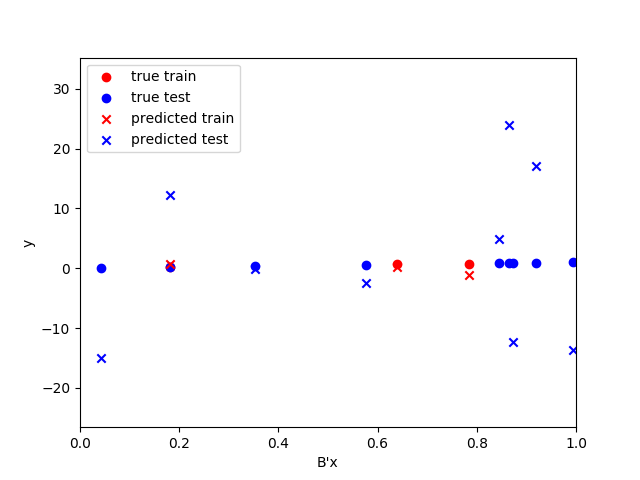

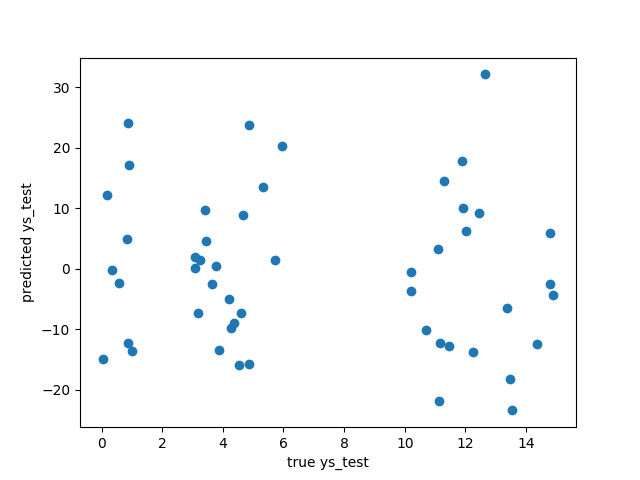

12625.5243874


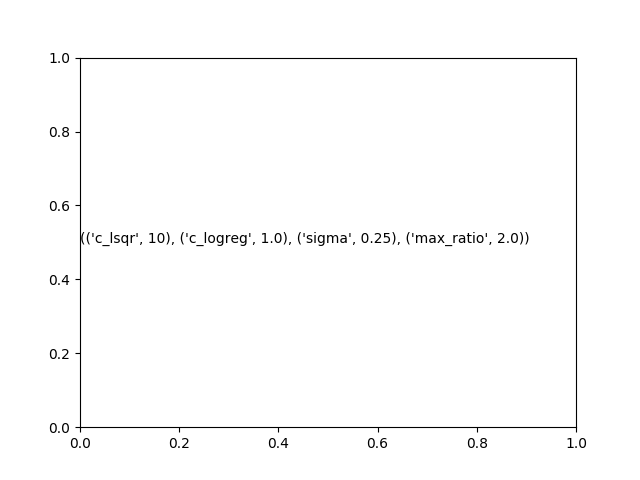

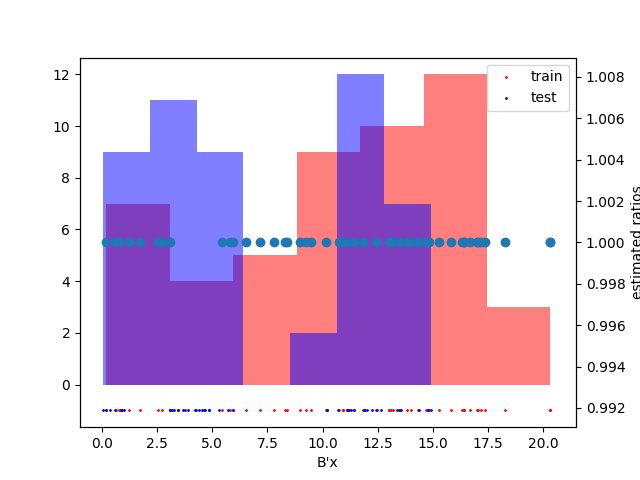

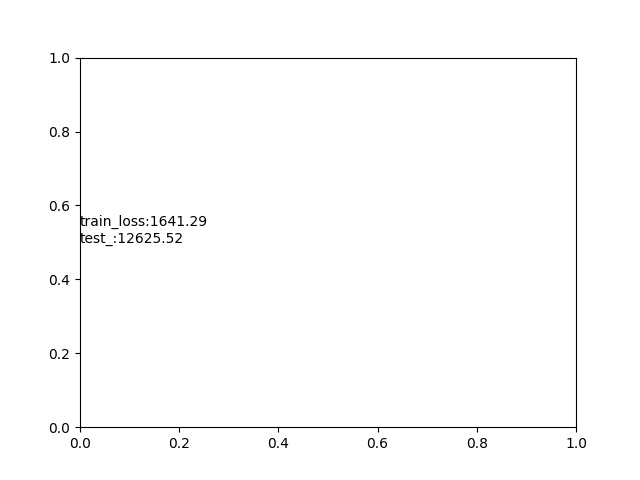

b_norm: 1.0


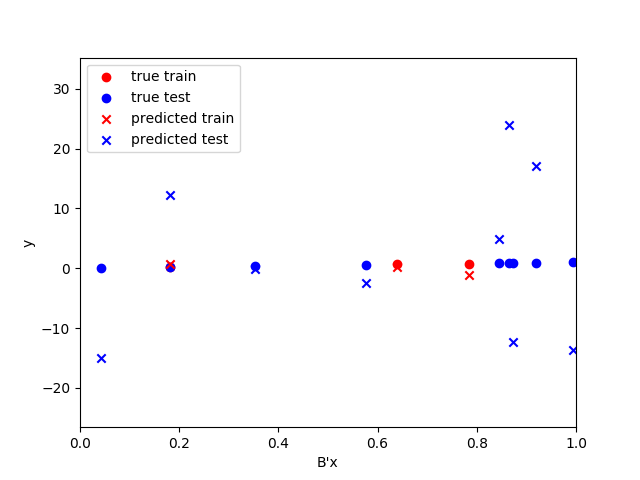

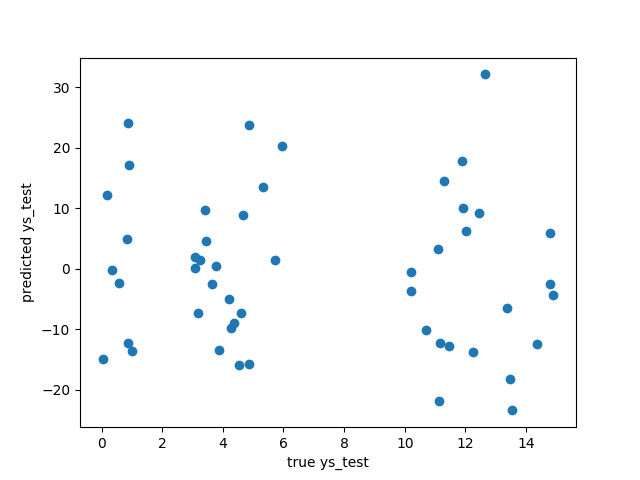

12625.5183579
                (c_lsqr, 10)                 
             (c_logreg, 0.1)  (c_logreg, 1.0)
               (sigma, 0.25)    (sigma, 0.25)
            (max_ratio, 2.0) (max_ratio, 2.0)
mean_loss           12625.52         12625.52
std_loss                   0                0
test_losses  [12625.5243874]  [12625.5183579]


(c_lsqr, 10) 
 
 
 
 (c_logreg, 0.1) 
 (c_logreg, 1.0) 
 
 
 
 (sigma, 0.25) 
 (sigma, 0.25) 
 
 
 
 (max_ratio, 2.0) 
 (max_ratio, 2.0) 
 
 
 
 
 mean_loss 
 12625.52 
 12625.52 
 
 
 std_loss 
 0 
 0 
 
 
 test_losses 
 [12625.5243874] 
 [12625.5183579]

In [38]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)